<a href="https://colab.research.google.com/github/nhwwnhww/2048/blob/main/Na%C3%AFve_DFT_vs_FFT_with_Timings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive DFT vs FFT
Generated using Gemini 2.5 Pro:
* Prompt 1
> Write a Python script that applies a naïve implementation of the discrete Fourier transform to a signal of length N containing a sine curve using Numpy

* Prompt 2
> Update it to show timings for both the naive DFT and the FFT

--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 0.967136 seconds
NumPy FFT Execution Time: 0.003377 seconds
FFT is approximately 286.39 times faster.

Our DFT implementation is close to NumPy's FFT: True


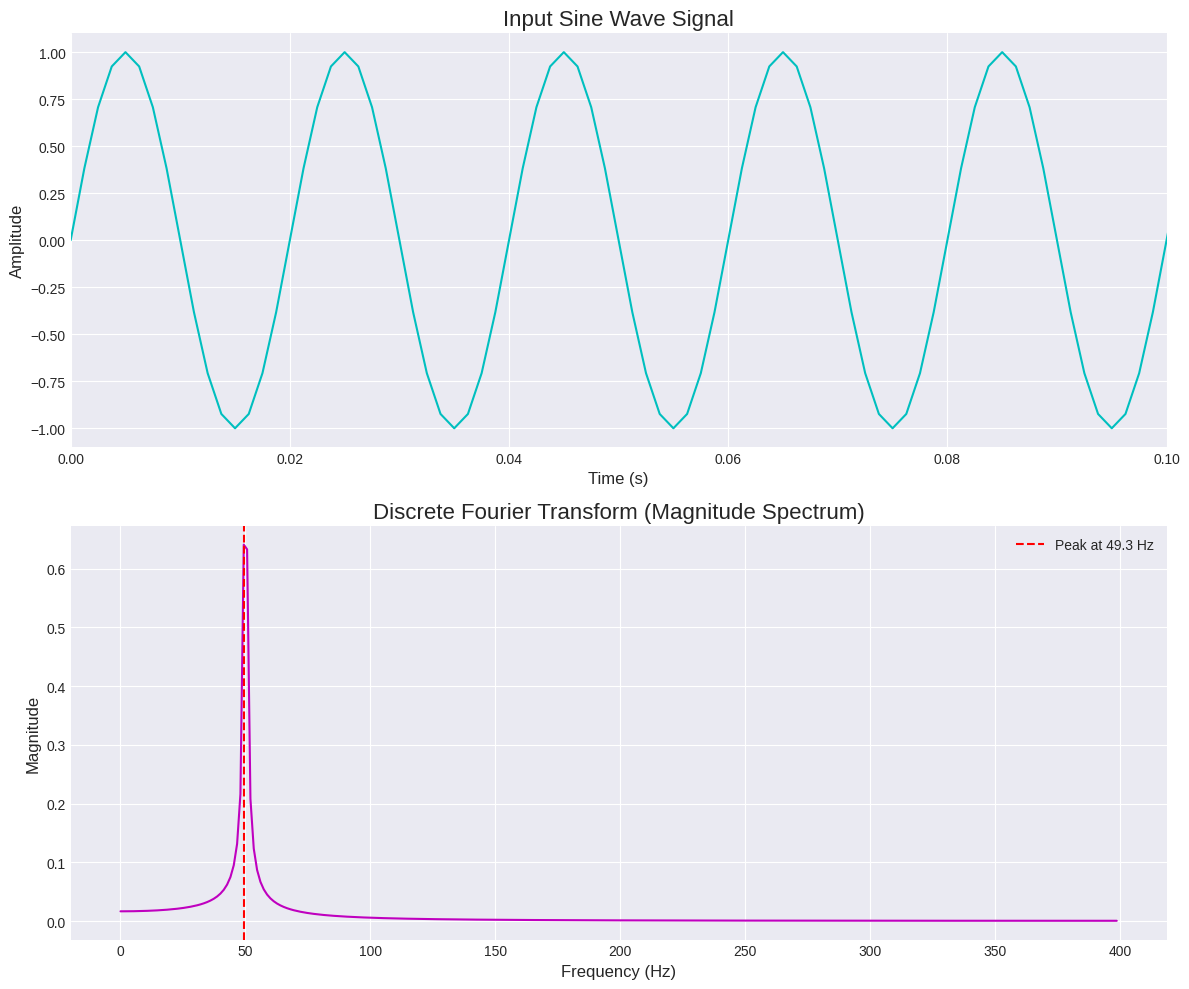

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def naive_dft(x):
    """
    Computes the Discrete Fourier Transform (DFT) of a 1D signal.

    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).

    Args:
        x (np.ndarray): The input signal, a 1D NumPy array.

    Returns:
        np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)
    # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)

    # Iterate through each frequency bin (k)
    for k in range(N):
        # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)

    return X

# --- Main Script ---

# 1. Generate the Signal
# Parameters for the signal
N = 600                # Number of sample points
SAMPLE_RATE = 800.0    # Sampling rate in Hz
FREQUENCY = 50.0       # Frequency of the sine wave in Hz

# Calculate sample spacing
T = 1.0 / SAMPLE_RATE

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, N * T, N, endpoint=False)

# Create the sine wave signal
y = np.sin(FREQUENCY * 2.0 * np.pi * t)

# 2. Apply the DFT and Time the Execution

# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(y)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Time NumPy's FFT implementation
start_time_fft = time.time()
fft_result = np.fft.fft(y)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")
# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case.
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")

# Check if our implementation is close to NumPy's result
# np.allclose is used for comparing floating-point arrays.
print(f"\nOur DFT implementation is close to NumPy's FFT: {np.allclose(dft_result, fft_result)}")


# 4. Prepare for Plotting
# Generate the frequency axis for the plot.
# np.fft.fftfreq returns the DFT sample frequencies.
# We only need the first half of the frequencies (the positive ones) due to symmetry.
xf = np.fft.fftfreq(N, T)[:N//2]

# 5. Visualize the Results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the original time-domain signal
ax1.plot(t, y, color='c')
ax1.set_title('Input Sine Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 0.1) # Show a few cycles of the sine wave
ax1.grid(True)

# Plot the frequency-domain signal (magnitude of the DFT)
# We normalize the magnitude by N and multiply by 2 to get the correct amplitude.
magnitude = 2.0/N * np.abs(dft_result[0:N//2])
ax2.plot(xf, magnitude, color='m')
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.grid(True)

# Add a vertical line to mark the peak frequency
peak_freq_index = np.argmax(magnitude)
peak_freq = xf[peak_freq_index]
ax2.axvline(peak_freq, color='r', linestyle='--', label=f'Peak at {peak_freq:.1f} Hz')
ax2.legend()


plt.tight_layout()
plt.show()